In [1]:
import numpy as np
import matplotlib.pyplot as plt
from ForwardTime import *
from math import pi, exp

In [2]:
class RickerSource():
    # data
    
    # function
    # total_time = computation time class, position = the location(row and list of array) of source(x,z)
    # duration = the lasting time of source(s), fm = basic frequency
    # direction = the direction where the force adding in
    def __init__(self, position, total_time, duration, fm, direction):
        dt = total_time._dt
        nt = int(duration / dt) + 1
        t_len = dt * (nt - 1)
        source_time_array = ForwardTime(dt, nt, t_len)
        source_array = self.ricker(source_time_array, fm)
        
        self._position = position
        self._sa = source_array
        self._sta = source_time_array
        self._direction = direction
        
    # ta = source time array（ForwardTime class, fm = basic frequency
    def ricker(self, ft, fm):
        ta = ft._t_array
        mid_time = int(ft._nt / 2) * ft._dt
        source_array = np.zeros(ft._nt)
        for tk , t in enumerate(ta):
            source_array[tk] = (1 - 2 * (pi * fm * (t-mid_time))**2) * exp(-(pi * fm * (t-mid_time))**2)
        # (1 - 2 * (pi * f_m * t)**2) * exp(-(pi * f_m * t) ** 2)
        return source_array
    
    def draw_wavelet(self):
        plt.plot(self._sta._t_array, self._sa)
        plt.title("The Source")
        plt.show()

In [3]:
total_time = ForwardTime(dt=0.001, nt=3000, t_len=3.)

In [7]:
ricker_source = RickerSource((10,100), total_time, 0.1, 30, 'x')

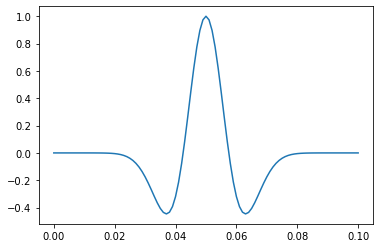

In [8]:
plt.plot(ricker_source._sta._t_array, ricker_source._sa)
plt.show()

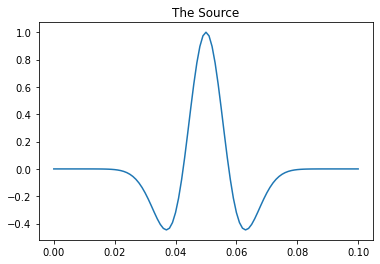

In [9]:
ricker_source.draw_wavelet()